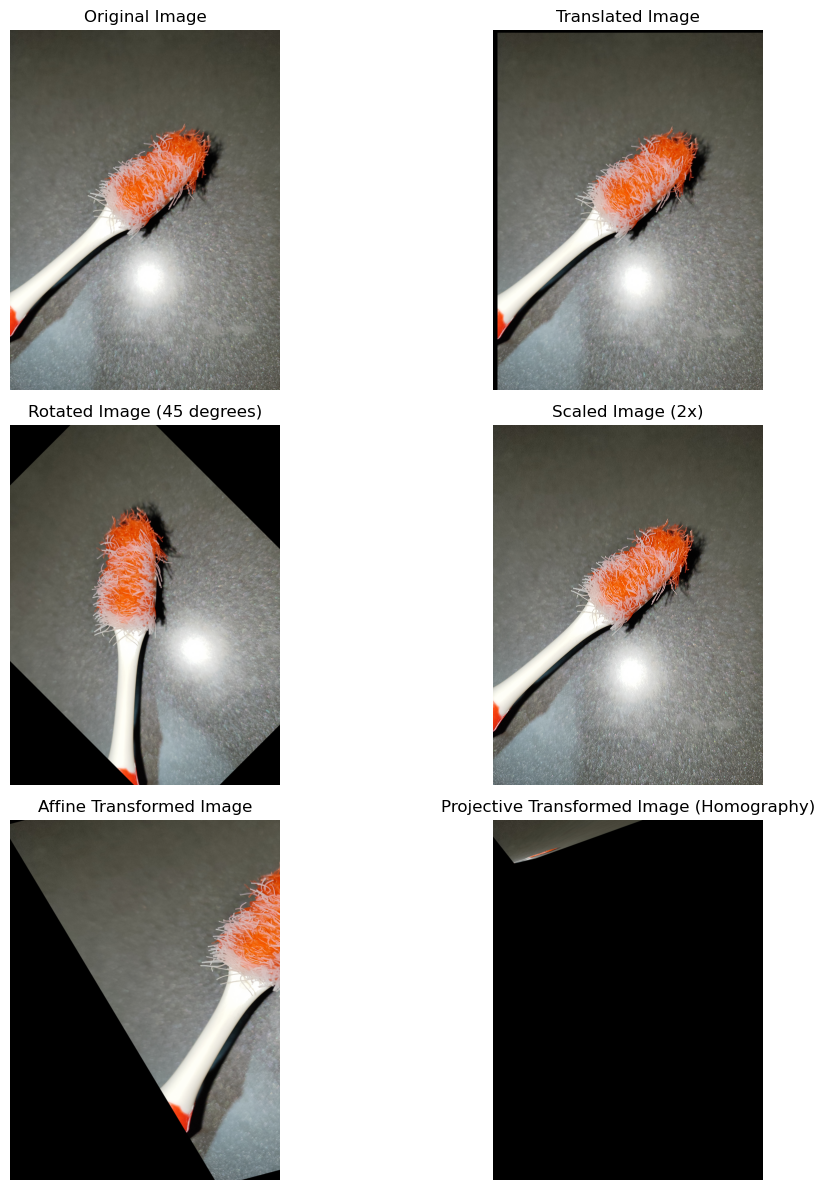

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\Used_Toothbrush.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Function to display images using Matplotlib
def display_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# === 1. Translation ===
tx, ty = 50, 30  # Translate by 50 pixels right and 30 pixels down
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (image.shape[1], image.shape[0]))

# === 2. Rotation ===
center = (image.shape[1] // 2, image.shape[0] // 2)
angle = 45  # Rotate by 45 degrees
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image.shape[1], image.shape[0]))

# === 3. Scaling ===
scaled_image = cv2.resize(image_rgb, None, fx=2, fy=2)  # Scale by 2

# === 4. Affine Transformation ===
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
affine_matrix = cv2.getAffineTransform(pts1, pts2)
affine_transformed_image = cv2.warpAffine(image_rgb, affine_matrix, (image.shape[1], image.shape[0]))

# === 5. Projective Transformation (Homography) ===
pts1_homography = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2_homography = np.float32([[10, 100], [200, 50], [100, 250], [220, 220]])
homography_matrix, _ = cv2.findHomography(pts1_homography, pts2_homography)
projective_transformed_image = cv2.warpPerspective(image_rgb, homography_matrix, (image.shape[1], image.shape[0]))

# === Display All Results ===
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# Original image
ax[0, 0].imshow(image_rgb)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Translated image
ax[0, 1].imshow(translated_image)
ax[0, 1].set_title('Translated Image')
ax[0, 1].axis('off')

# Rotated image
ax[1, 0].imshow(rotated_image)
ax[1, 0].set_title('Rotated Image (45 degrees)')
ax[1, 0].axis('off')

# Scaled image
ax[1, 1].imshow(scaled_image)
ax[1, 1].set_title('Scaled Image (2x)')
ax[1, 1].axis('off')

# Affine Transformed image
ax[2, 0].imshow(affine_transformed_image)
ax[2, 0].set_title('Affine Transformed Image')
ax[2, 0].axis('off')

# Projective Transformed image
ax[2, 1].imshow(projective_transformed_image)
ax[2, 1].set_title('Projective Transformed Image (Homography)')
ax[2, 1].axis('off')

plt.tight_layout()
plt.show()
